# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
#import api_keys
from api_keys import api_keys
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
# print(cities[0:10])
# print(lat_lngs)

df = {'Cities': cities}
cities_df = pd.DataFrame(df)
# # cities_df.head()
# cities_df.shape

(605, 1)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
lat = []
lng = []
temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# Build partial query URL
query_url = f"{url}appid={api_keys}&units={units}&q="

for city in cities:
    #time.sleep(1)
    response = requests.get(query_url + city).json()
    
    try:
        lat.append(response['coord']['lat'])
        #print(lat)
        lng.append(response['coord']['lon'])
        #print(lng)
        temp.append(response['main']['temp'])
        #print(temp)
        humidity.append(response['main']['humidity'])
        #print(humidity)
        cloudiness.append(response['clouds']['all'])
        #print(cloudiness)
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
    #print(wind_speed)
    except KeyError:
        #print("Skipping city")
        lat.append("NAN")
        lng.append("NAN")
        temp.append("NAN")
        humidity.append("NAN")
        cloudiness.append("NAN")
        wind_speed.append("NAN")
        country.append("NAN")
        date.append("NAN")
# print(response)
# print(len(lat))
# print(len(lng))
# print(len(temp))
# print(len(humidity))
# print(len(cloudiness))
# print(len(wind_speed))
# print(len(country))
#len(date)


605

In [12]:
df = {
    'City': cities,
    'Lat': lat,
    'Lng': lng,
    'Temp': temp,
    'Humidity': humidity,
    'Cloudiness': cloudiness,
    'Wind Speed': wind_speed,
    'Country': country,
    'Date': date
}
cities_df = pd.DataFrame(df)
cities_df.head(20)    
cities_df.count()

City          605
Lat           605
Lng           605
Temp          605
Humidity      605
Cloudiness    605
Wind Speed    605
Country       605
Date          605
dtype: int64

In [13]:
cleaned_cities_df = cities_df[cities_df.Country != 'NAN']
cleaned_cities_df.head(20)
cleaned_cities_df.count()

City          544
Lat           544
Lng           544
Temp          544
Humidity      544
Cloudiness    544
Wind Speed    544
Country       544
Date          544
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
cleaned_cities_df.to_csv('output_data_file')
cleaned_cities_df.head(50)

,City,Lat,Lng,Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,busselton,-33.64,115.35,16.92,100,24,3.15,AU,1546190504
1,vaini,15.34,74.49,18.67,56,0,2.62,IN,1546190504
2,east london,-33.02,27.91,22,83,0,4.1,ZA,1546189200
3,naze,5.43,7.07,31,70,0,4.1,NG,1546185600
4,kapaa,22.08,-159.32,21.81,81,75,6.2,US,1546188960
5,hermanus,-34.42,19.24,21.42,53,0,2.62,ZA,1546190505
6,dikson,73.51,80.55,-13.19,100,64,17.42,RU,1546190506
7,coleraine,55.13,-6.67,10.63,81,90,6.2,GB,1546188600
8,coihaique,-45.58,-72.07,14.55,54,75,4.1,CL,1546189200
9,georgetown,6.8,-58.16,26.53,83,75,7.2,GY,1546189200


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

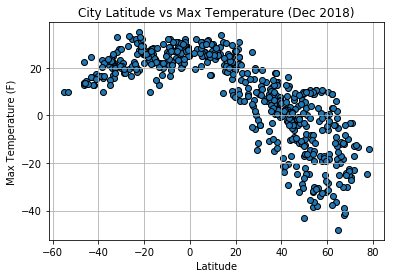

In [47]:
#plotting setup
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs Max Temperature (Dec 2018)')

# Build a scatter plot for each data type
plt.scatter(cleaned_cities_df["Lat"], cleaned_cities_df["Temp"],edgecolor='black', marker="o")
plt.grid()
#plt.savefig("Homework_6.png")
plt.savefig('Homewoork6 Lat vs Temp.png', dpi=100, bbox_inches='tight')
plt.show()

#### Latitude vs. Humidity Plot

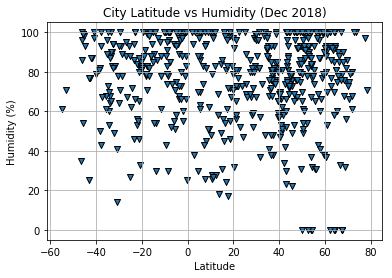

In [48]:
#plotting setup
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs Humidity (Dec 2018)')

# Build a scatter plot for each data type
plt.scatter(cleaned_cities_df["Lat"], cleaned_cities_df["Humidity"],edgecolor='black', marker="v")
plt.grid()
plt.savefig('Homewoork6 Lat vs Humidity.png', dpi=100, bbox_inches='tight')
plt.show()

#### Latitude vs. Cloudiness Plot

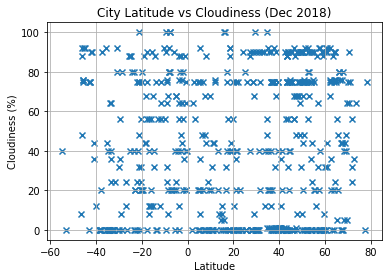

In [49]:
#plotting setup
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs Cloudiness (Dec 2018)')

           # Build a scatter plot for each data type
plt.scatter(cleaned_cities_df["Lat"], cleaned_cities_df["Cloudiness"],edgecolor='black', marker="x")
plt.grid()
plt.savefig('Homewoork6 Lat vs Clouds.png', dpi=100, bbox_inches='tight')
plt.show()

#### Latitude vs. Wind Speed Plot

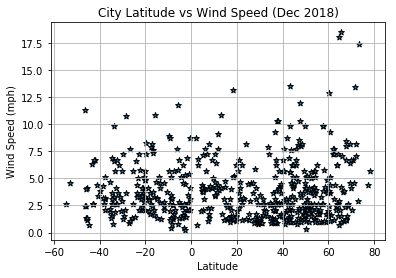

In [50]:
#plotting setup
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs Wind Speed (Dec 2018)')

# Build a scatter plot for each data type
plt.scatter(cleaned_cities_df["Lat"], cleaned_cities_df["Wind Speed"],edgecolor='black', marker="*")
plt.grid()
plt.savefig('Homewoork6 Lat vs Wind.png', dpi=100, bbox_inches='tight')
plt.show()
